# Load du lieu VCB len

In [59]:
import yfinance as yf
import time 
import redis
import json
import pandas as pd
import numpy as np
import datetime

symbol = "VCB.VN"
start_date = "2023-10-01"
end_date = "2023-11-24"
ohlcv = yf.download(symbol, start=start_date, end=end_date, interval="15m")

# Chuyển dữ liệu thành DataFrame
data = pd.DataFrame(ohlcv, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

[*********************100%***********************]  1 of 1 completed


# Mo phong loi nhuan

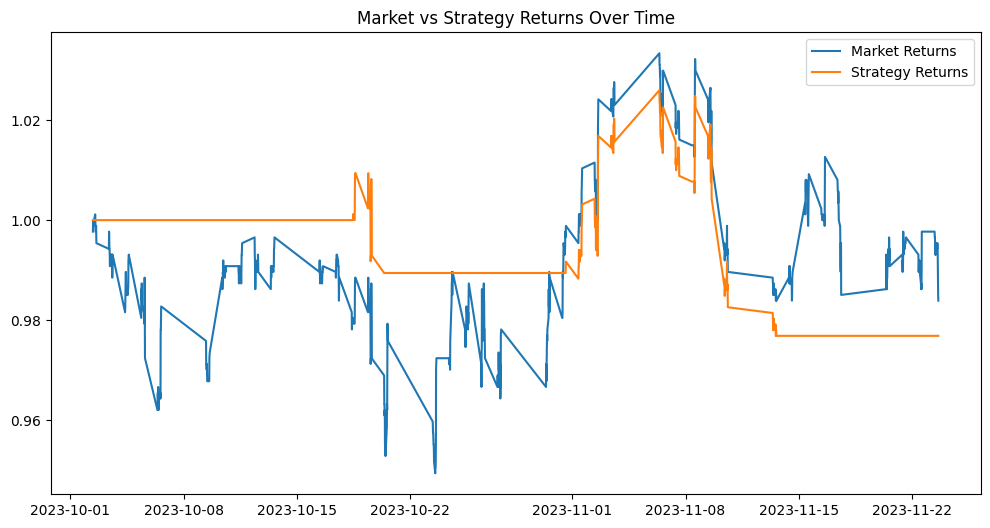

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# Tính MA và ATR
ma_fast_period = 50
ma_slow_period = 200
atr_period = 14
atr_threshold = 1000

data['MA_Fast'] = data['Close'].rolling(window=ma_fast_period).mean()
data['MA_Slow'] = data['Close'].rolling(window=ma_slow_period).mean()

# data['TR'] = np.maximum(data['High'] - data['Low'], np.maximum(abs(data['High'] - data['Close'].shift()), abs(data['Low'] - data['Close'].shift())))
# data['ATR'] = data['TR'].rolling(window=atr_period).mean()
data['TR'] = data['High'] - data['Low']
data['ATR'] = data['TR'].rolling(window=atr_period).mean()

# Xác định tín hiệu mua/bán
data['Signal'] = np.where((data['MA_Fast'] > data['MA_Slow']) & (data['ATR'] <= atr_threshold), 1, 0)
data['Position'] = data['Signal'].shift()

# Tính lợi nhuận (không tính phí giao dịch)
data['Market_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Market_Return'] * data['Position']

# Tính lợi nhuận lũy kế
data['Cumulative_Market_Returns'] = (1 + data['Market_Return']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Return']).cumprod()

data.to_csv('Buoi 9.5 - Backtest Tong quat.csv')

# Vẽ biểu đồ lợi nhuận
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title('Market vs Strategy Returns Over Time')
plt.legend()
plt.show()